## Análisis Final

In [1]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_final=pd.read_parquet('../data/processed/data_final.parquet')

In [3]:
#Prueba
data_final[data_final['Usercode']=='-Y-']

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
5,-Y-,16.0,0.0,0.0,-32.0,1.19,0,1


In [61]:
data_final.head(6)

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
0,----------------,10.333333,0.673333,0.013667,-7.30,1.790000,2,3
1,--dilib--,210.750000,0.517500,0.008125,-867.63,3.020000,2,3
2,-31337-,32.500000,0.950000,0.000000,-33.50,36.630000,3,1
3,-Nothing-,322.876923,0.919385,0.011402,-3120.69,2.702615,42,2
4,-Tachyon,1024.800000,0.978000,0.022200,-1494.32,1.696000,4,0
5,-Y-,16.000000,0.000000,0.000000,-32.00,1.190000,0,1


In [63]:
#Filtro de clientes cluster 0
customer_3=data_final.query('Cluster==3')
customer_3

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
0,----------------,10.333333,0.673333,0.013667,-7.30,1.790000,2,3
1,--dilib--,210.750000,0.517500,0.008125,-867.63,3.020000,2,3
8,-__---,21775.708333,1.089583,0.008762,67276.25,6.974583,19,3
9,-i_,3.000000,1.140000,0.012000,0.96,1.295000,2,3
10,-mdK,5000.000000,1.380000,0.017400,1986.83,1.520000,1,3
...,...,...,...,...,...,...,...,...
4130,zhuzhik,2.000000,1.200000,0.017500,0.87,4.575000,2,3
4131,zigfrid,11.185185,0.658519,0.006730,-80.87,7.700370,7,3
4136,zlatek,200.000000,1.100000,0.012100,22.42,1.190000,1,3
4139,zoidberg128,3870.727273,1.074545,0.010327,6684.64,3.706364,10,3


In [64]:
customer_3.describe()

,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
count,1667.000000,1667.000000,1667.000000,1.667000e+03,1667.000000,1667.000000,1667.0
mean,4920.562605,1.232104,0.011244,5.723657e+03,12.927477,7.943011,3.0
std,26045.963117,1.063293,0.004069,7.719801e+04,98.197659,8.969322,0.0
min,1.000000,0.238000,0.000000,-8.454236e+05,0.520000,1.000000,3.0
25%,24.833333,0.880000,0.007957,-6.983500e+01,2.517500,2.000000,3.0
50%,179.181818,1.050000,0.010433,2.307000e+01,3.860000,4.000000,3.0
75%,1070.875000,1.279706,0.013932,7.809150e+02,6.647407,10.000000,3.0
max,487500.000000,20.772500,0.021600,1.875559e+06,2893.938889,40.000000,3.0


In [65]:
#Se elimina la columna de clientes para hacer gráficos
wousercode=customer_3.drop(columns='Usercode')
wousercode

,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
0,10.333333,0.673333,0.013667,-7.30,1.790000,2,3
1,210.750000,0.517500,0.008125,-867.63,3.020000,2,3
8,21775.708333,1.089583,0.008762,67276.25,6.974583,19,3
9,3.000000,1.140000,0.012000,0.96,1.295000,2,3
10,5000.000000,1.380000,0.017400,1986.83,1.520000,1,3
...,...,...,...,...,...,...,...
4130,2.000000,1.200000,0.017500,0.87,4.575000,2,3
4131,11.185185,0.658519,0.006730,-80.87,7.700370,7,3
4136,200.000000,1.100000,0.012100,22.42,1.190000,1,3
4139,3870.727273,1.074545,0.010327,6684.64,3.706364,10,3


In [66]:
#Se organiza por mayor profit
wousercode.sort_values(by='Profit', ascending=False)

,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
643,487500.000000,2.920000,0.013700,1875559.41,8.955000,2,3
2667,235210.526316,1.192105,0.008826,1544213.87,3.902105,8,3
3458,151722.363636,0.900000,0.007482,932131.31,3.590909,8,3
3584,480000.000000,2.230000,0.013500,596856.84,2.880000,1,3
644,294028.666667,1.470000,0.013633,505875.30,10.413333,2,3
...,...,...,...,...,...,...,...
3292,57333.333333,0.860000,0.016283,-128274.12,8.000000,3,3
1933,27685.117647,0.736471,0.008318,-159723.48,4.376471,8,3
3433,40604.878049,0.951220,0.007432,-161593.92,7.560976,16,3
3097,109504.166667,0.771667,0.007217,-752148.77,3.152500,15,3


In [67]:
#Los profit positivos
positives_3=wousercode[wousercode['Profit']>0]
positives_3

,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
8,21775.708333,1.089583,0.008762,67276.25,6.974583,19,3
9,3.000000,1.140000,0.012000,0.96,1.295000,2,3
10,5000.000000,1.380000,0.017400,1986.83,1.520000,1,3
11,211.851852,1.141852,0.006978,4025.45,4.573333,10,3
13,13.142857,1.257143,0.013957,1.43,4.304286,4,3
...,...,...,...,...,...,...,...
4125,5.666667,1.110000,0.006667,2.81,2.496667,3,3
4130,2.000000,1.200000,0.017500,0.87,4.575000,2,3
4136,200.000000,1.100000,0.012100,22.42,1.190000,1,3
4139,3870.727273,1.074545,0.010327,6684.64,3.706364,10,3


In [68]:
wousercode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1667 entries, 0 to 4143
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bet        1667 non-null   float64
 1   CashedOut  1667 non-null   float64
 2   Bonus      1667 non-null   float64
 3   Profit     1667 non-null   float64
 4   BustedAt   1667 non-null   float64
 5   Result     1667 non-null   int64  
 6   Cluster    1667 non-null   int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 97.7 KB


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


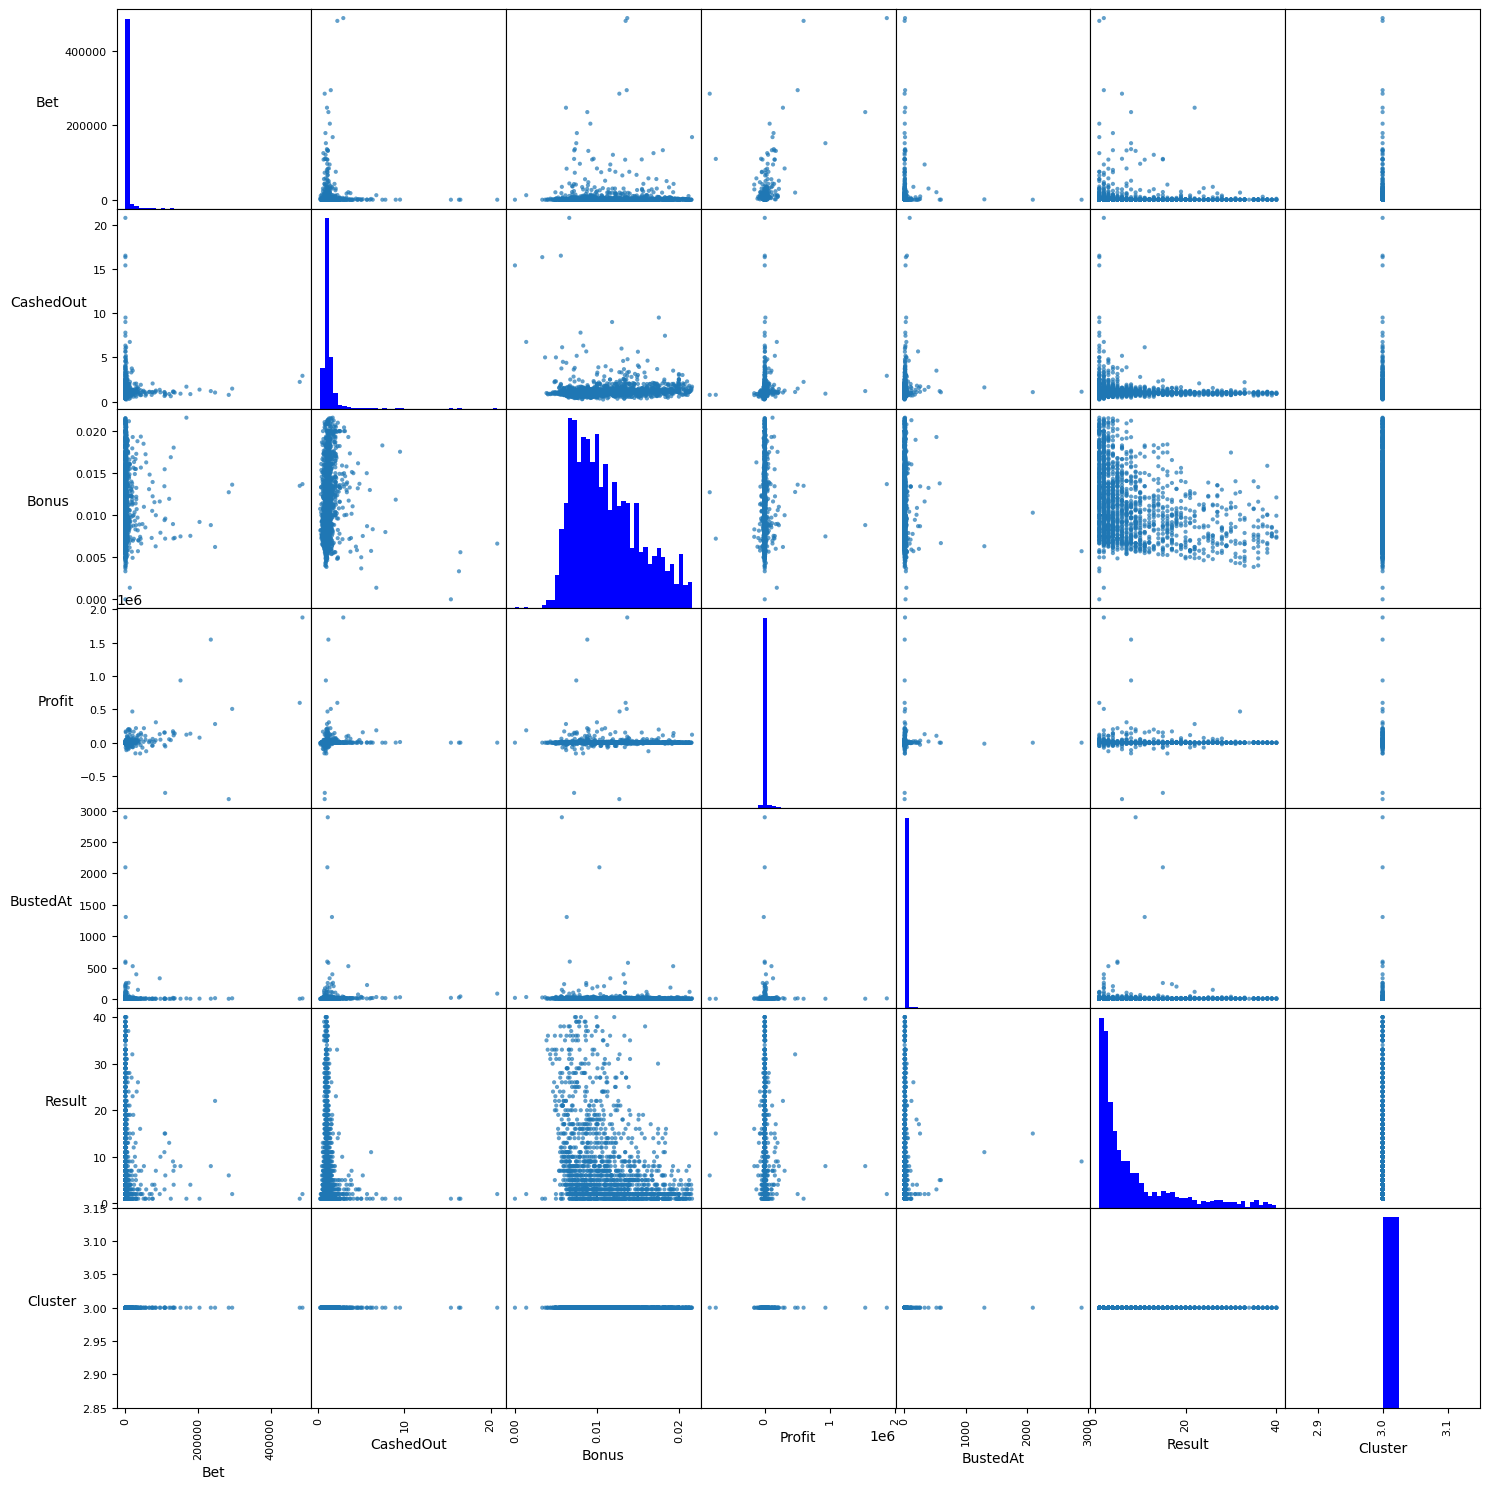

In [69]:
# Grafica de dispersión e histograma con variables 
#colorsd = wousercode['Result'].map({1: 'lightblue', 0: 'black'})
axesd=pd.plotting.scatter_matrix(wousercode, alpha=0.7, figsize=(15,15), range_padding = 0.1, diagonal='hist',
                            hist_kwds = {'bins':40, 'color':'blue'})

for ax in axesd.flatten():
    ax.xaxis.label.set_rotation(0)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [70]:
#Agrupación de las columnas de cluster 0
customer_3.agg({'Bet':'sum', 'CashedOut':'mean', 'Bonus':'mean', 'Profit':'sum', 'BustedAt':'mean',	'Result':'sum',	'Cluster':'mean'}).apply(lambda x: '{:.2f}'.format(x))

Bet          8202577.86
CashedOut          1.23
Bonus              0.01
Profit       9541336.81
BustedAt          12.93
Result         13241.00
Cluster            3.00
dtype: object

In [71]:
aa=customer_3.agg({'Bet':'sum', 'CashedOut':'mean', 'Bonus':'mean', 'Profit':'sum', 'BustedAt':'mean',	'Result':'sum',	'Cluster':'mean'})

In [72]:
formatted_result = aa.apply(lambda x: '{:.2f}'.format(x))
formatted_result

Bet          8202577.86
CashedOut          1.23
Bonus              0.01
Profit       9541336.81
BustedAt          12.93
Result         13241.00
Cluster            3.00
dtype: object

In [73]:
#Se divide profit y losses para ver si todos los clientes son perdedores o está nivelado (Prueba)
data_positiva=data_final[data_final['Profit']>0]
data_negativa=data_final[data_final['Profit']<0]

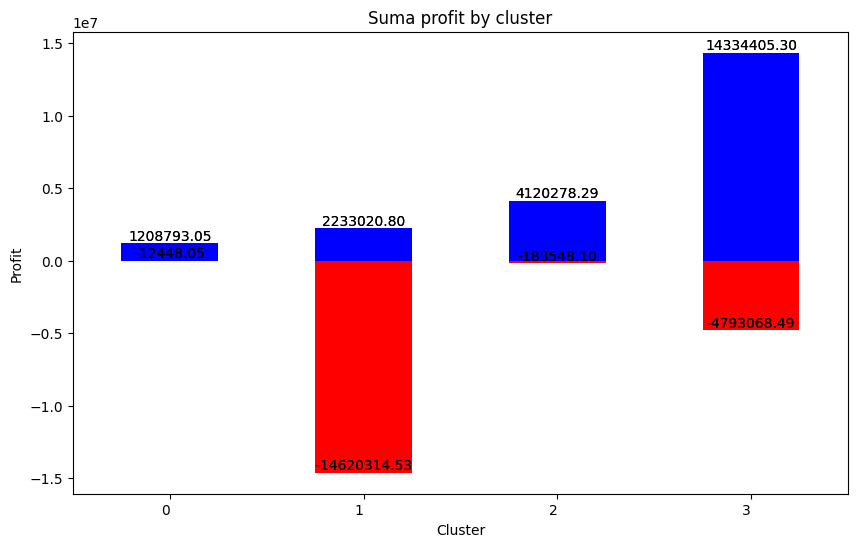

In [74]:
#Se hace un gráfico comparando las dos situaciones por cluster
barrasclusterpos=data_positiva.groupby('Cluster')['Profit'].sum()
barrasclusterneg=data_negativa.groupby('Cluster')['Profit'].sum()
plt.figure(figsize=(10,6))
pos=barrasclusterpos.plot(kind='bar',color='blue')
neg=barrasclusterneg.plot(kind='bar',color='red')

for bar in pos.patches:
    
    height = bar.get_height()
    a = height+0.5 #if height>0 else height - 0.06* abs(height)
    plt.text(bar.get_x() + bar.get_width()/2, a, f'{height:.2f}',ha='center',va='bottom')
pos.set_xticklabels(pos.get_xticklabels(), rotation=0, ha='right')

for bar in neg.patches:
    
    height = bar.get_height()
    b = height -0.5 #if height>0 else height - 0.06* abs(height)
    plt.text(bar.get_x() + bar.get_width()/2, b, f'{height:.2f}',ha='center',va='bottom')
neg.set_xticklabels(neg.get_xticklabels(), rotation=0, ha='right')

plt.title('Suma profit by cluster')
plt.xlabel('Cluster')
plt.ylabel('Profit')
plt.show()

<Figure size 1200x700 with 0 Axes>

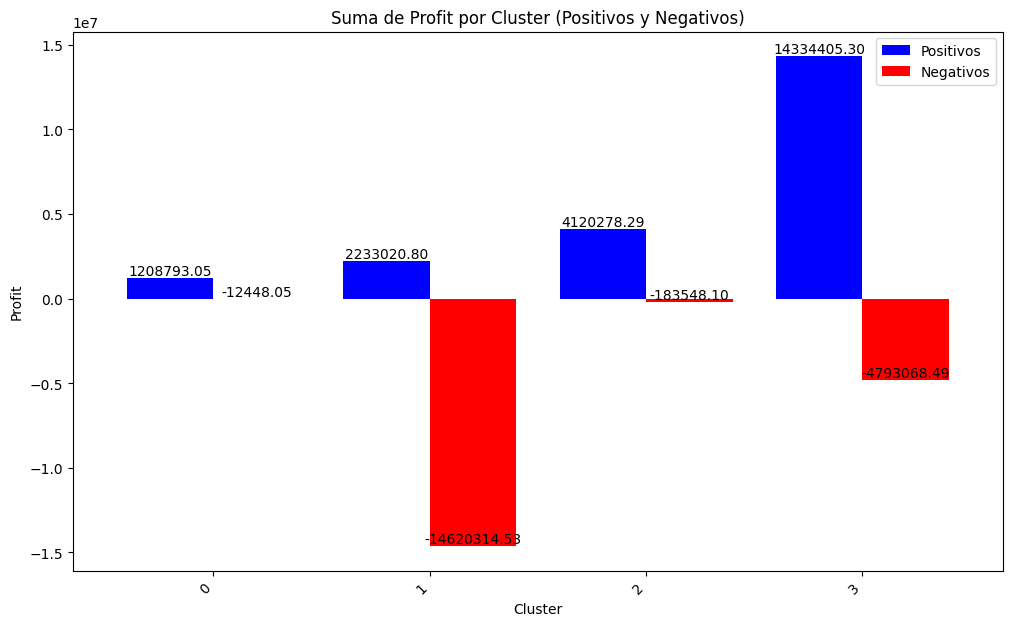

In [75]:
#Chatgpt
plt.figure(figsize=(12, 7))

# Crear un DataFrame combinado para facilitar la visualización
combined_df = pd.DataFrame({
    'Positivos': barrasclusterpos,
    'Negativos': barrasclusterneg
}).fillna(0)  # Rellena los NaNs con 0 si hay clusters en uno pero no en el otro

# Crear el gráfico de barras agrupadas
ax = combined_df.plot(kind='bar', color=['blue', 'red'], width=0.8, figsize=(12, 7))

# Añadir etiquetas a las barras
for patch in ax.patches:
    height = patch.get_height()
    a = height + 0.5 if height > 0 else height - 0.5
    plt.text(patch.get_x() + patch.get_width()/2, a, f'{height:.2f}', ha='center', va='bottom')

# Ajustar la rotación de las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Añadir título y etiquetas
plt.title('Suma de Profit por Cluster (Positivos y Negativos)')
plt.xlabel('Cluster')
plt.ylabel('Profit')

# Mostrar el gráfico
plt.show()

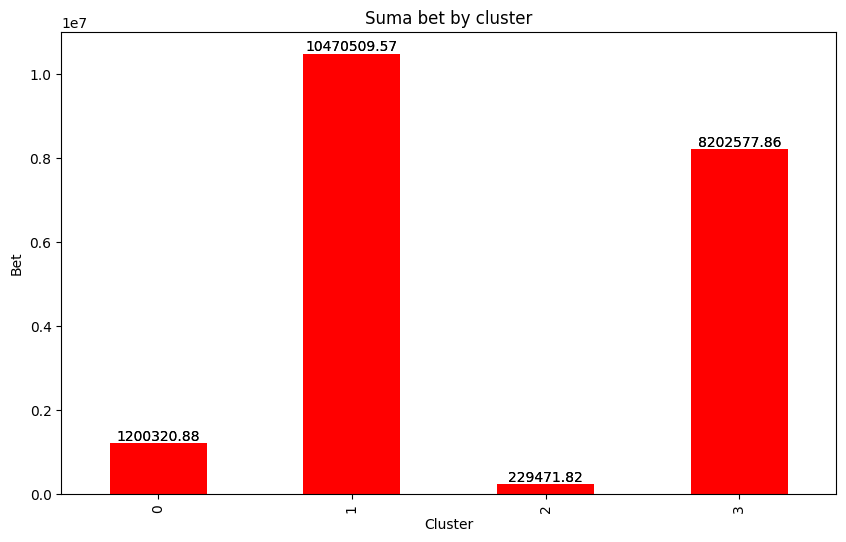

In [76]:
#La suma de lo apostado por tipo de cluster
barrascluster=data_final.groupby('Cluster')['Bet'].sum()
plt.figure(figsize=(10,6))
barrascluster.plot(kind='bar',color='red')

for bar in barrascluster.plot(kind='bar',color='red').patches:
    
    height = bar.get_height()
    a = height +0.5 if height>0 else height - 0.06* abs(height)
    plt.text(bar.get_x() + bar.get_width()/2, a, f'{height:.2f}',ha='center',va='bottom')

plt.title('Suma bet by cluster')
plt.xlabel('Cluster')
plt.ylabel('Bet')
plt.show()

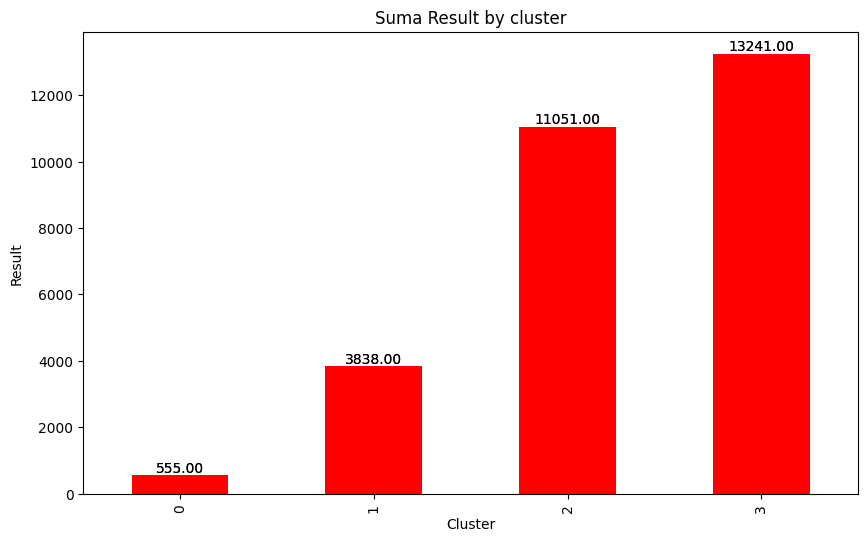

In [77]:
#Número de veces que los clientes ganaron
barrascluster=data_final.groupby('Cluster')['Result'].sum()
plt.figure(figsize=(10,6))
barrascluster.plot(kind='bar',color='red')

for bar in barrascluster.plot(kind='bar',color='red').patches:
    
    height = bar.get_height()
    a = height +0.5 if height>0 else height - 0.06* abs(height)
    plt.text(bar.get_x() + bar.get_width()/2, a, f'{height:.2f}',ha='center',va='bottom')

plt.title('Suma Result by cluster')
plt.xlabel('Cluster')
plt.ylabel('Result')
plt.show()

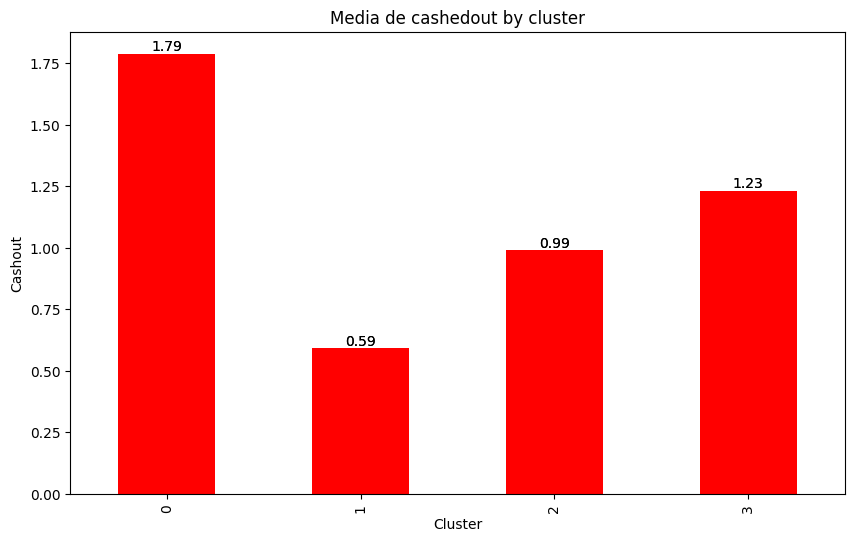

In [78]:
#Media de cashout que hacen los clientes
barrascluster=data_final.groupby('Cluster')['CashedOut'].mean()
plt.figure(figsize=(10,6))
barrascluster.plot(kind='bar',color='red')

for bar in barrascluster.plot(kind='bar',color='red').patches:
    
    height = bar.get_height()
    a = height if height>0 else height - 0.06* abs(height)
    plt.text(bar.get_x() + bar.get_width()/2, a, f'{height:.2f}',ha='center',va='bottom')

plt.title('Media de cashedout by cluster')
plt.xlabel('Cluster')
plt.ylabel('Cashout')
plt.show()

In [79]:
barrascluster=data_final.groupby('Cluster')[data_final[data_final['BustedAt']==0]].count()
plt.figure(figsize=(10,6))
barrascluster.plot(kind='bar',color='red')

for bar in barrascluster.plot(kind='bar',color='red').patches:
    
    height = bar.get_height()
    a = height if height>0 else height - 0.06* abs(height)
    plt.text(bar.get_x() + bar.get_width()/2, a, f'{height:.2f}',ha='center',va='bottom')

plt.title('Suma profit by cluster')
plt.xlabel('Cluster')
plt.ylabel('Profit')
plt.show()

TypeError: unhashable type: 'DataFrame'

In [80]:
#Clientes que no ganaron nada
data_final[data_final['Result']==0]

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
5,-Y-,16.0,0.0,0.0,-32.0,1.190,0,1
18,01Nov,220.0,0.0,0.0,-220.0,1.990,0,1
22,0x22B,250.0,0.0,0.0,-250.0,1.200,0,1
26,10__________10,600.0,0.0,0.0,-600.0,1.190,0,1
28,1213141516171819,5.5,0.0,0.0,-11.0,2.895,0,1
...,...,...,...,...,...,...,...,...
4112,zKevo,750.0,0.0,0.0,-1500.0,1.195,0,1
4115,zach719,30.0,0.0,0.0,-30.0,4.440,0,1
4117,zafizzle,501.5,0.0,0.0,-1003.0,1.825,0,1
4135,zivone,10.0,0.0,0.0,-10.0,1.700,0,1


In [81]:
#Ganancias cluster 3
wousercode.groupby('Cluster')['Profit'].sum()

Cluster
3    9541336.81
Name: Profit, dtype: float64

In [88]:
#Clientes cluster 3 ganadores por encima de 100000
data_final[(data_final['Cluster'] == 3) & (data_final['Profit'] > 100000)].sort_values(by='Profit', ascending=False)

,Usercode,Bet,CashedOut,Bonus,Profit,BustedAt,Result,Cluster
643,GPL89,487500.000000,2.920000,0.013700,1875559.41,8.955000,2,3
2667,goosin2000,235210.526316,1.192105,0.008826,1544213.87,3.902105,8,3
3458,rapidfireman,151722.363636,0.900000,0.007482,932131.31,3.590909,8,3
3584,sce919,480000.000000,2.230000,0.013500,596856.84,2.880000,1,3
644,GPL_V2,294028.666667,1.470000,0.013633,505875.30,10.413333,2,3
2304,coinminers,19114.058824,1.088235,0.012763,467006.28,4.109412,32,3
1227,NYAN_HUNTER,83890.100000,1.249000,0.010000,305298.18,3.563000,7,3
3743,stevemoley,246932.040000,1.027200,0.006224,279457.17,12.595200,22,3
2683,gsmfast,29132.764706,1.427647,0.008812,217437.88,3.644706,5,3
3346,pagong99,51006.700000,1.092000,0.011000,217030.81,4.585000,8,3


In [87]:
#Lista final de clientes que gananron más de 100000 y se deberán analizar por qué han ganado tanto y tomar medidas
data_final[(data_final['Cluster'] == 3) & (data_final['Profit'] > 100000)].sort_values(by='Profit', ascending=False)['Usercode']

643            GPL89
2667      goosin2000
3458    rapidfireman
3584          sce919
644           GPL_V2
2304      coinminers
1227     NYAN_HUNTER
3743      stevemoley
2683         gsmfast
3346        pagong99
1629           Sp1cy
1201      Mozikachal
2231      bustabuts1
254      Billionaire
3399         platon1
3774            suri
2677       greatsnob
538          Ecz0tic
101         Addict3d
2888           kakti
2133            beth
362        Chelashin
1152          Mezzah
1828     Wackahacker
2663        goldman1
3535        rtpsquad
1657         SuckDad
2997         lakshya
2050        aquablue
3984           vohag
3174          miriam
3754      stresmatic
2643         ghaghan
2932          king82
Name: Usercode, dtype: object